# Homework 6 (more of a tutorial, really)

As I was browsing through Kaggle the other day, I came upon a brand new dataset from the University of Puerto Rico, which contains images of bees entering their hive.  The task is to determine automatically which bees are carrying pollen.  Your job will be to develop a convolutional neural network that performs this task.  

## 1. Load Data (0 pts)

First, we need to load the bee data, which is included along with this homework.  Fortunately, the authors of the Kaggle dataset provided a nice set of files which will do this for us, which I have reproduced below

In [2]:
import glob, os 
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
path="images/"
imlist= glob.glob(os.path.join(path, '*.jpg'))

In [4]:
def dataset(file_list,size=(300,180),flattened=False):
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

In [5]:
# Load the dataset (may take a few seconds)
X,y=dataset(imlist)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))

X:  (714, 300, 180, 3)
y:  (714,)
Class 0:  345
Class 1:  369
Total  :  714


We can plot a couple of the images below.  If you check out a couple of these, you will see that the visible difference when bees carry pollen is the presence of large fluffy balls of pollen on their back legs.

(300, 180, 3)

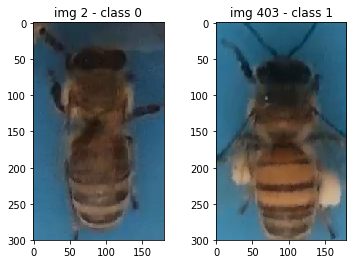

In [70]:
fig, axes = plt.subplots(1,2)
k=2
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=403
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));
X[k].shape

## 2. A convolutional network architecture for bee classification (40 pts)

**Implement a 2D convolutional neural network using Keras.  You are free to choose whatever network architecture you like.**

You can find all the relevant syntax for implementing such a network [here](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py), the Keras convnet example for MNIST.

*(For the sake of comparison, I will share the one that I used:*

Layer 1: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 2: 4x4 Max-pooling layer

Layer 3: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 4: 4x4 Max-pooling layer

Layer 5: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 6: 4x4 Max-pooling layer

Layer 7: Flattening layer

Layer 8: Dropout layer with 0.2 dropout probability

Layer 9: 1 node sigmoid layer


In [15]:
import keras
import keras.models as km
import keras.layers as kl
import numpy as np


input_shape = ((300,180,3))

model = km.Sequential()


model.add(kl.Conv2D(24, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))
model.add(kl.Conv2D(24, (5,5), activation='relu')) 
model.add(kl.MaxPooling2D(pool_size=(4, 4)))
model.add(kl.Conv2D(24, (4,4), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(4,4)))
#model.add(kl.Conv2D(24, (5,5), activation='relu'))
#model.add(kl.MaxPooling2D(pool_size=(4,4)))
model.add(kl.Flatten())
model.add(kl.Dropout(0.25))
model.add(kl.Dense(1, activation='sigmoid'))




## 3. Fitting the CNN to data (20 pts)

Compile your model, using a binary crossentropy loss function and an optimizer of your choosing (RMSprop worked well for me).  Select a batch size and number of epochs, and fit your model to the training data, while also keeping track of the test set accuracy.

**Plot the training and test accuracy of your model at each epoch.  Comment on whether you think the model is being overfit.**

In [16]:
model.compile(loss=keras.losses.binary_crossentropy,                #! Specify a loss function
              optimizer=keras.optimizers.Adadelta(),           #! Specify an optimizer
              metrics=['accuracy'])

batch_size = 100                #! Specify a batch size
epochs = 60   #! Specify an epoch  
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test))

#! Plot test and training accuracy (note that the history.history object is a dictionary containing relevant info)

Train on 571 samples, validate on 143 samples
Epoch 1/60
571/571 [==============================] - 5s 10ms/step - loss: 0.6898 - acc: 0.5289 - val_loss: 0.6831 - val_acc: 0.5245
Epoch 2/60
571/571 [==============================] - 5s 9ms/step - loss: 0.6811 - acc: 0.5884 - val_loss: 0.6775 - val_acc: 0.5315
Epoch 3/60
571/571 [==============================] - 5s 9ms/step - loss: 0.6675 - acc: 0.6025 - val_loss: 0.6306 - val_acc: 0.7413
Epoch 4/60
571/571 [==============================] - 6s 10ms/step - loss: 0.6200 - acc: 0.6970 - val_loss: 0.5947 - val_acc: 0.6783
Epoch 5/60
571/571 [==============================] - 6s 10ms/step - loss: 0.6460 - acc: 0.6357 - val_loss: 0.5913 - val_acc: 0.7552
Epoch 6/60
571/571 [==============================] - 6s 11ms/step - loss: 0.5963 - acc: 0.7303 - val_loss: 0.6892 - val_acc: 0.5105
Epoch 7/60
571/571 [==============================] - 7s 12ms/step - loss: 0.6097 - acc: 0.6550 - val_loss: 0.5150 - val_acc: 0.7902
Epoch 8/60
571/571 [=====

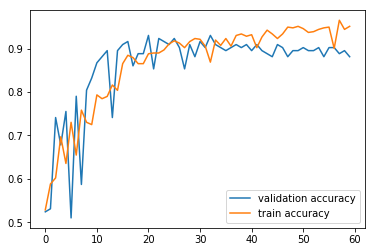

In [18]:
plt.plot(np.arange(epochs),history.history['val_acc'], label='validation accuracy')
plt.plot(np.arange(epochs),history.history['acc'], label = 'train accuracy')
plt.legend()


It seems we dont improve in the validation accuracy after about 10 epochs. However, we start to become more reliable after about 40 epochs and shortly thereafter start diverging from training accuracy suggesting we are starting to overfit. 

## 4. Model evaluation (20 pts)

Now that you have a trained model, make a prediction for the test set (model.predict is a useful function for this).  **Compute and display a confusion matrix.  Select and display an example from the test set of a true positive, a true negative, a false positive, and a false negative.  Speculate on the reasons behind misclassification for images that your model predicted incorrectly**.

In [19]:
predict = model.predict(X_test)
predict[predict<=.5] = 0
predict[predict>.5] =1

In [124]:
import sklearn as sk
sk.metrics.confusion_matrix(y_pred=predict, y_true=y_test)

for k in [.1,.5,.9]:
    predict[predict<=k] = 0
    predict[predict>k] =1
    print ('confusion with decision boundary == ', k,': ')
    print (sk.metrics.confusion_matrix(y_pred=predict, y_true=y_test))
    

confusion with decision boundary ==  0.1 : 
[[62  6]
 [11 64]]
confusion with decision boundary ==  0.5 : 
[[62  6]
 [11 64]]
confusion with decision boundary ==  0.9 : 
[[62  6]
 [11 64]]


In [110]:
# simple single array aprroach
# new array for each scenario, true positve, true negative ... etc. 

tp = np.zeros(predict.size)
for i in range(predict.size):
    if predict[i] == 1 and y_test[i] == 1:  # true positve = 1, 0 otherwise
        tp[i] = 1
    else:
        tp[i] = 0

fp = np.zeros(predict.size)
for i in range(predict.size):
    if predict[i] == 1 and y_test[i]==0: # false positive = 1,   0 otherwise
        fp[i]=1

fn = np.zeros(predict.size)
for i in range(predict.size):
    if predict[i] == 0 and y_test[i]==1: # false negative = 1,   0 otherwise
        fn[i]=1
        
tn = np.zeros(predict.size)
for i in range(predict.size):
    if predict[i] == 0 and y_test[i]== 0: # true negative = 1,   0 otherwise
        tn[i]=1

In [125]:
fn[fn==1].size, tn[tn==1].size, fp[fp==1].size, tp[tp==1].size


(11, 62, 6, 64)

Text(0.5,1,'true negative')

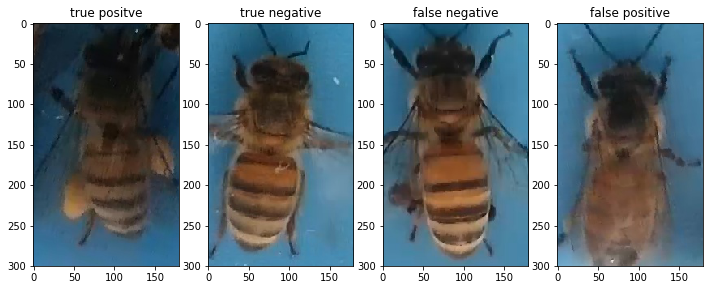

In [131]:
fig, axes = plt.subplots(1,4)
fig.set_size_inches([12,25])

#select an appropriate index
tps=np.random.randint(tp[tp==1].size)
fps=np.random.randint(fp[fp==1].size)
fns=np.random.randint(fn[fn==1].size)
tns=np.random.randint(tn[tn==1].size)

plt.sca(axes[0])
plt.imshow(X_test[tp == 1][tps])
plt.title('true positve')


plt.sca(axes[3])
plt.imshow(X_test[fp == 1][fps])
plt.title('false positive')

plt.sca(axes[2])
plt.imshow(X_test[fn == 1][fns])
plt.title('false negative')

plt.sca(axes[1])
plt.imshow(X_test[tn == 1][tns])
plt.title('true negative')


##### Speculation:

True positives are classified when there is an obvious yellow bulge around the rear legs, larger and brighter bulges should be picked up in the convulation layer easier and should be easier to predict. 

True negatives seem to not have any yellow bulges or anything that could be mistaken for it near the body of the bee.

False negatives might be have a higher concentrations of pictures which aren't as good of quality for instance whereby the model can't see the pollen becasue of a dark image, the legs tucked under the bee, or simply a small amount of pollen that when convoluted gets averaged with darkness around and doesn't seem as distinct, smaller convulation layers might help for this. I also saw some where the pollen is farther away from the bees body on the legs of the bee. I don't know how you'd prevent mischaracterizing this without more training data. Superficially speaking, you could locate the legs and weight the area around them higher, but this is likely difficult, since you'd have to first identify the legs, and two hadd some additional model or layer to account for this. 

False positives might have a wing or some other bright amorphous bit protruding from the bee(i.e. wings) the network categorizes as pollen. These could also be brighter images or have influence of glar that 'looks' like pollen in the rgb scheme. 

More training and testing data would be helpful as this seems like a relatively small number of images to train the algorithm on. I could then also increase the dropout rate to help prevent overtraining. 